<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_8__Transfer_Lerning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## - Fast Feature Extraction without Data Augmentation

In [1]:
from keras.applications.vgg16 import VGG16

In [12]:
!unzip cats_and_dogs_small.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cats_and_dogs_small/train/cats/cat.333.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.333.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.864.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.864.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.870.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.870.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.680.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.680.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.858.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.858.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.99.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.99.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.694.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.694.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.72.jpg  
  inflating: __MACOS

In [2]:
conv_base = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [19]:
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./155)
batch_size = 20

In [22]:
def extract_features(dir, sample_count):
  features = np.zeros(shape = (sample_count, 4, 4, 512))
  labels = np.zeros(shape = (sample_count))
  generator = datagen.flow_from_directory(
      dir,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size: (i+1) * batch_size] = features_batch
    labels[i * batch_size: (i+1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)                              

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [27]:
from keras.layers import Dense, Dropout
from keras import models
from tensorflow.keras import optimizers

In [30]:
model = models.Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(
    train_features,
    train_labels,
    epochs = 30,
    batch_size = 20,
    validation_data = (validation_features, validation_labels)
)
model.save('cats_and_dogs_small_3.h5')

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


100/100 [==============================] - 3s 24ms/step - loss: 0.5153 - acc: 0.7355 - val_loss: 0.3028 - val_acc: 0.9160
Epoch 2/30
100/100 [==============================] - 2s 19ms/step - loss: 0.3301 - acc: 0.8615 - val_loss: 0.2438 - val_acc: 0.9250
Epoch 3/30
100/100 [==============================] - 2s 18ms/step - loss: 0.2748 - acc: 0.8875 - val_loss: 0.2089 - val_acc: 0.9350
Epoch 4/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2307 - acc: 0.9140 - val_loss: 0.1864 - val_acc: 0.9360
Epoch 5/30
100/100 [==============================] - 2s 19ms/step - loss: 0.2115 - acc: 0.9100 - val_loss: 0.1859 - val_acc: 0.9380
Epoch 6/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1866 - acc: 0.9295 - val_loss: 0.1730 - val_acc: 0.9410
Epoch 7/30
100/100 [==============================] - 2s 18ms/step - loss: 0.1775 - acc: 0.9300 - val_loss: 0.1550 - val_acc: 0.9430
Epoch 8/30
100/100 [==============================] - 2s 18ms/step - loss: 0.162

In [31]:
import matplotlib.pyplot as plt

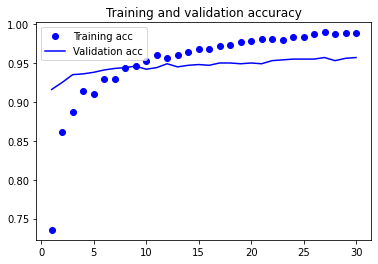

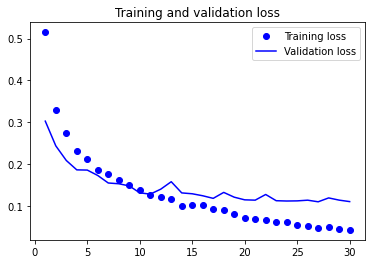

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()